<a href="https://colab.research.google.com/github/nameera-khan/Fraud_detect_dashboard/blob/main/Fraud_detect_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import os
import pandas as pd

# Step 1: Download dataset
path = kagglehub.dataset_download("sayalikhot21/synthetic-dataset-for-e-commerce-return-analysis")
print("Downloaded files are at:", path)

# Step 2: List files
print("Files inside path:", os.listdir(path))

# Step 3: Load a CSV file (replace 'your_file.csv' with real name)
csv_filename = os.listdir(path)[0]  # Assuming first file is the CSV
file_path = os.path.join(path, csv_filename)

df = pd.read_csv(file_path)

# Step 4: Show data
print(df.head())


100%|██████████| 287k/287k [00:00<00:00, 51.0MB/s]

Extracting files...
Downloaded files are at: /root/.cache/kagglehub/datasets/sayalikhot21/synthetic-dataset-for-e-commerce-return-analysis/versions/1
Files inside path: ['ecommerce_returns_synthetic_data.csv']
      Order_ID    Product_ID       User_ID  Order_Date Return_Date  \
0  ORD00000000  PROD00000000  USER00000000  2023-08-05  2024-08-26   
1  ORD00000001  PROD00000001  USER00000001  2023-10-09  2023-11-09   
2  ORD00000002  PROD00000002  USER00000002  2023-05-06         NaN   
3  ORD00000003  PROD00000003  USER00000003  2024-08-29         NaN   
4  ORD00000004  PROD00000004  USER00000004  2023-01-16         NaN   

  Product_Category  Product_Price  Order_Quantity Return_Reason Return_Status  \
0         Clothing         411.59               3  Changed mind      Returned   
1            Books         288.88               3    Wrong item      Returned   
2             Toys         390.03               5           NaN  Not Returned   
3             Toys         401.09            

## Pipeline

1. Load the data
2. Preprocess text fields (refund claim description)
3. Engineer numerical features (refund rate, etc.)
4. Prepare training data (X, y)
5. Build and train models (Logistic Regression, XGBoost)
6. Evaluate the models
7. Explain predictions (SHAP or feature importance)
8. Save models (optional)


In [2]:
#data exploration
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          10000 non-null  object 
 1   Product_ID        10000 non-null  object 
 2   User_ID           10000 non-null  object 
 3   Order_Date        10000 non-null  object 
 4   Return_Date       5052 non-null   object 
 5   Product_Category  10000 non-null  object 
 6   Product_Price     10000 non-null  float64
 7   Order_Quantity    10000 non-null  int64  
 8   Return_Reason     5052 non-null   object 
 9   Return_Status     10000 non-null  object 
 10  Days_to_Return    5052 non-null   float64
 11  User_Age          10000 non-null  int64  
 12  User_Gender       10000 non-null  object 
 13  User_Location     10000 non-null  object 
 14  Payment_Method    10000 non-null  object 
 15  Shipping_Method   10000 non-null  object 
 16  Discount_Applied  10000 non-null  float64

In [3]:
df.head()

,Order_ID,Product_ID,User_ID,Order_Date,Return_Date,Product_Category,Product_Price,Order_Quantity,Return_Reason,Return_Status,Days_to_Return,User_Age,User_Gender,User_Location,Payment_Method,Shipping_Method,Discount_Applied
0,ORD00000000,PROD00000000,USER00000000,2023-08-05,2024-08-26,Clothing,411.59,3,Changed mind,Returned,387.0,58,Male,City54,Debit Card,Next-Day,45.27
1,ORD00000001,PROD00000001,USER00000001,2023-10-09,2023-11-09,Books,288.88,3,Wrong item,Returned,31.0,68,Female,City85,Credit Card,Express,47.79
2,ORD00000002,PROD00000002,USER00000002,2023-05-06,NaN,Toys,390.03,5,NaN,Not Returned,NaN,22,Female,City30,Debit Card,Next-Day,26.64
3,ORD00000003,PROD00000003,USER00000003,2024-08-29,NaN,Toys,401.09,3,NaN,Not Returned,NaN,40,Male,City95,PayPal,Next-Day,15.37
4,ORD00000004,PROD00000004,USER00000004,2023-01-16,NaN,Books,110.09,4,NaN,Not Returned,NaN,34,Female,City80,Gift Card,Standard,16.37


In [4]:
print(df.tail())

print("Dataset Shape: ",df.shape
)

print("Data Types:")
print(df.dtypes)

         Order_ID    Product_ID       User_ID  Order_Date Return_Date  \
9995  ORD00009995  PROD00009995  USER00009995  2023-10-20         NaN   
9996  ORD00009996  PROD00009996  USER00009996  2023-02-25         NaN   
9997  ORD00009997  PROD00009997  USER00009997  2024-05-10         NaN   
9998  ORD00009998  PROD00009998  USER00009998  2024-02-13         NaN   
9999  ORD00009999  PROD00009999  USER00009999  2024-12-08  2024-09-09   

     Product_Category  Product_Price  Order_Quantity     Return_Reason  \
9995             Home         142.50               4               NaN   
9996      Electronics         484.63               3               NaN   
9997             Toys         386.57               5               NaN   
9998             Toys         129.22               1               NaN   
9999             Toys         459.42               5  Not as described   

     Return_Status  Days_to_Return  User_Age User_Gender User_Location  \
9995  Not Returned             NaN        

In [5]:
print(df.isnull().sum())

Order_ID               0
Product_ID             0
User_ID                0
Order_Date             0
Return_Date         4948
Product_Category       0
Product_Price          0
Order_Quantity         0
Return_Reason       4948
Return_Status          0
Days_to_Return      4948
User_Age               0
User_Gender            0
User_Location          0
Payment_Method         0
Shipping_Method        0
Discount_Applied       0
dtype: int64


In [6]:
#% of missing values
print((df.isnull().sum()/len(df))*100)

Order_ID             0.00
Product_ID           0.00
User_ID              0.00
Order_Date           0.00
Return_Date         49.48
Product_Category     0.00
Product_Price        0.00
Order_Quantity       0.00
Return_Reason       49.48
Return_Status        0.00
Days_to_Return      49.48
User_Age             0.00
User_Gender          0.00
User_Location        0.00
Payment_Method       0.00
Shipping_Method      0.00
Discount_Applied     0.00
dtype: float64


### Fix Data types

In [7]:
# Convert dates to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Return_Date'] = pd.to_datetime(df['Return_Date'])

In [8]:
# Binary target
df['Is_Returned'] = df['Return_Status'].apply(lambda x: 1 if x == 'Returned' else 0)

# Order Month and Weekday
df['Order_Month'] = df['Order_Date'].dt.month
df['Order_Weekday'] = df['Order_Date'].dt.day_name()


In [10]:
df.Is_Returned.value_counts()

,count
Is_Returned,
1,5052
0,4948


## Exploratory data analysis

Is_Returned
1    50.52
0    49.48
Name: proportion, dtype: float64


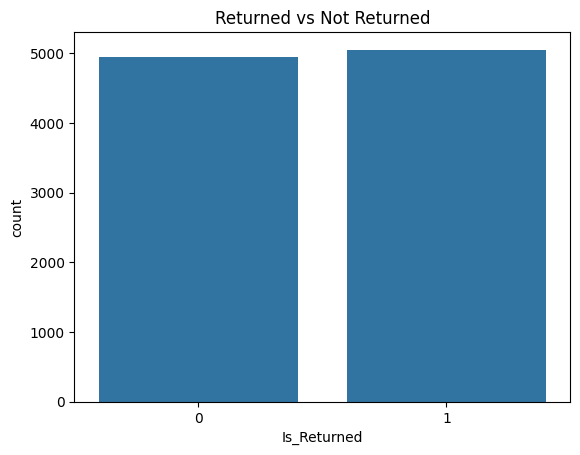

In [11]:
# Return Rate
print(df['Is_Returned'].value_counts(normalize=True) * 100)

# Visual
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Is_Returned', data=df)
plt.title('Returned vs Not Returned')
plt.show()


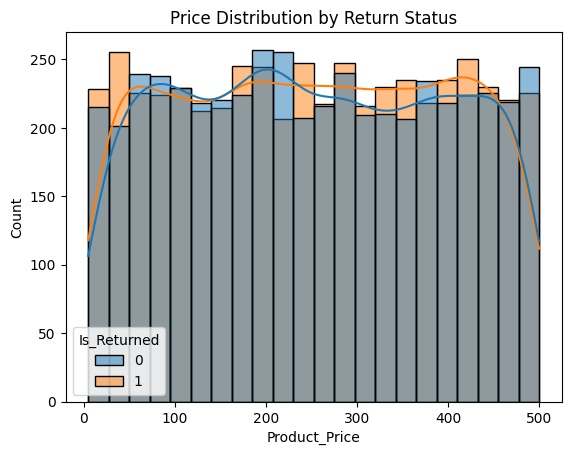

In [12]:
# to visualise the normalisation between product price and product return
sns.histplot(data=df, x='Product_Price', hue='Is_Returned', kde=True)
plt.title('Price Distribution by Return Status')
plt.show()

- Product prices are evenly distributed.
- Across all price points ($ 0 to $ 500), there are a similar number of purchases.
- There is no strong skew toward either very cheap or very expensive products.
- Return behavior does not strongly depend on price.
- Both returned and non-returned orders are spread fairly evenly across all price ranges.
- You don't see huge peaks for returns at low or high prices — returns happen across all prices almost uniformly.

Insights:

- Product price alone is not a strong predictor of whether a refund will happen.
We'll likely need to combine price with other features (like shipping method, return reason, user behaviour) to build a strong fraud detection model.

- The need to explore return reasons and analyse the most behaviour.
- User-level patterns where the returns are made by the same users.


### Return reason analysis

In [13]:
# Only look at returned orders
returned_df = df[df['Is_Returned'] == 1]

# Most common return reasons
reason_counts = returned_df['Return_Reason'].value_counts()

print(reason_counts)


Return_Reason
Defective           1327
Wrong item          1258
Changed mind        1255
Not as described    1212
Name: count, dtype: int64


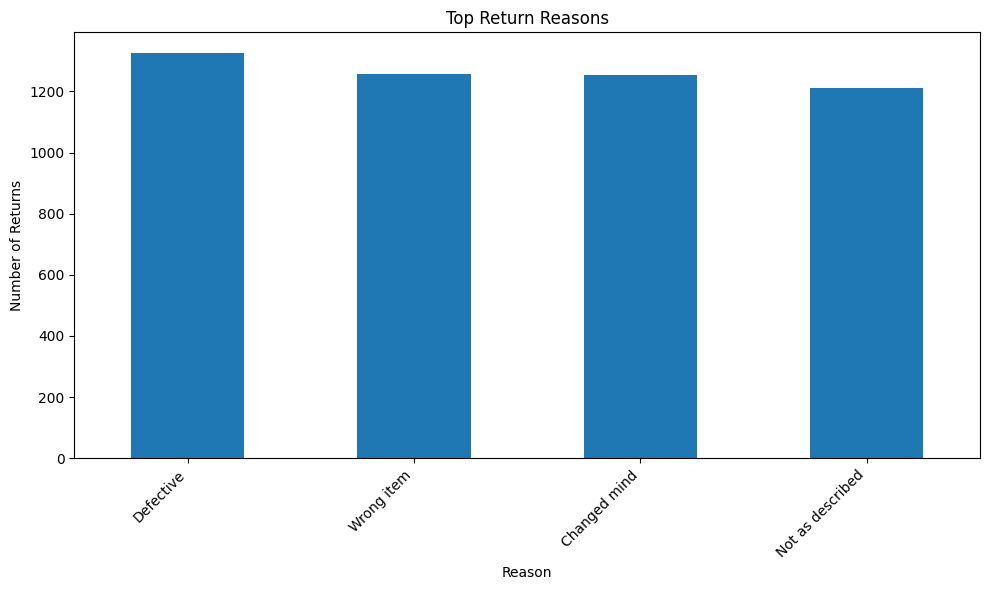

In [14]:

plt.figure(figsize=(10,6))
reason_counts.plot(kind='bar')
plt.title('Top Return Reasons')
plt.xlabel('Reason')
plt.ylabel('Number of Returns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Days to Return

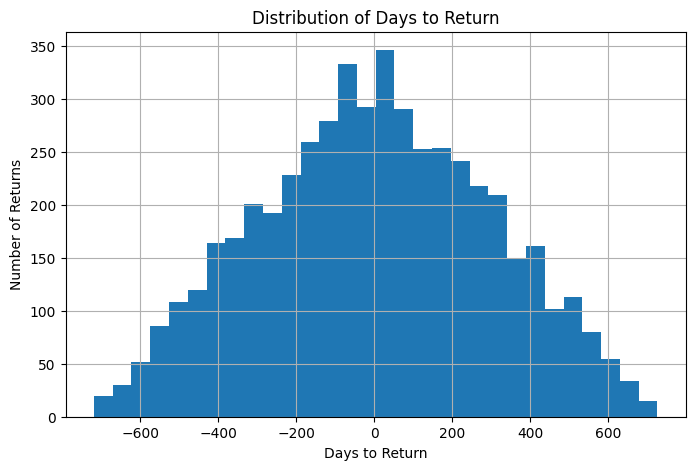

In [15]:
# Distribution of Days_to_Return
plt.figure(figsize=(8,5))
returned_df['Days_to_Return'].hist(bins=30)
plt.title('Distribution of Days to Return')
plt.xlabel('Days to Return')
plt.ylabel('Number of Returns')
plt.show()


In [16]:
# First make sure both dates are in datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Return_Date'] = pd.to_datetime(df['Return_Date'])

# Check if Return_Date is before Order_Date
mask_invalid_dates = df['Return_Date'] < df['Order_Date']

# How many such cases?
print(f"Number of invalid date cases: {mask_invalid_dates.sum()}")

# View a few invalid cases
print(df[mask_invalid_dates][['Order_ID', 'Order_Date', 'Return_Date']])


Number of invalid date cases: 2513
         Order_ID Order_Date Return_Date
8     ORD00000008 2024-12-25  2024-09-25
15    ORD00000015 2024-10-02  2023-12-04
18    ORD00000018 2024-10-07  2023-03-18
19    ORD00000019 2024-07-06  2024-05-01
21    ORD00000021 2024-02-28  2023-01-06
...           ...        ...         ...
9976  ORD00009976 2023-09-21  2023-03-19
9986  ORD00009986 2024-08-17  2024-07-15
9987  ORD00009987 2024-10-05  2023-03-10
9992  ORD00009992 2024-10-27  2024-03-14
9999  ORD00009999 2024-12-08  2024-09-09

[2513 rows x 3 columns]


In [17]:
df['Days_to_Return'] = (df['Return_Date'] - df['Order_Date']).dt.days


In [18]:
print(df['Days_to_Return'])

0       387.0
1        31.0
2         NaN
3         NaN
4         NaN
        ...  
9995      NaN
9996      NaN
9997      NaN
9998      NaN
9999    -90.0
Name: Days_to_Return, Length: 10000, dtype: float64


In [19]:
# Drop rows where Return Date is before Order Date
df = df[~mask_invalid_dates]


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7487 entries, 0 to 9998
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          7487 non-null   object        
 1   Product_ID        7487 non-null   object        
 2   User_ID           7487 non-null   object        
 3   Order_Date        7487 non-null   datetime64[ns]
 4   Return_Date       2539 non-null   datetime64[ns]
 5   Product_Category  7487 non-null   object        
 6   Product_Price     7487 non-null   float64       
 7   Order_Quantity    7487 non-null   int64         
 8   Return_Reason     2539 non-null   object        
 9   Return_Status     7487 non-null   object        
 10  Days_to_Return    2539 non-null   float64       
 11  User_Age          7487 non-null   int64         
 12  User_Gender       7487 non-null   object        
 13  User_Location     7487 non-null   object        
 14  Payment_Method    7487 non-nu

In [21]:
df.drop(columns='Days_to_Return',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7487 entries, 0 to 9998
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          7487 non-null   object        
 1   Product_ID        7487 non-null   object        
 2   User_ID           7487 non-null   object        
 3   Order_Date        7487 non-null   datetime64[ns]
 4   Return_Date       2539 non-null   datetime64[ns]
 5   Product_Category  7487 non-null   object        
 6   Product_Price     7487 non-null   float64       
 7   Order_Quantity    7487 non-null   int64         
 8   Return_Reason     2539 non-null   object        
 9   Return_Status     7487 non-null   object        
 10  User_Age          7487 non-null   int64         
 11  User_Gender       7487 non-null   object        
 12  User_Location     7487 non-null   object        
 13  Payment_Method    7487 non-null   object        
 14  Shipping_Method   7487 non-nu

In [22]:
# Only look at returned orders
returned_df = df[df['Is_Returned'] == 1]

# Most common return reasons
reason_counts = returned_df['Return_Reason'].value_counts()

print(reason_counts)


Return_Reason
Defective           681
Wrong item          626
Not as described    620
Changed mind        612
Name: count, dtype: int64


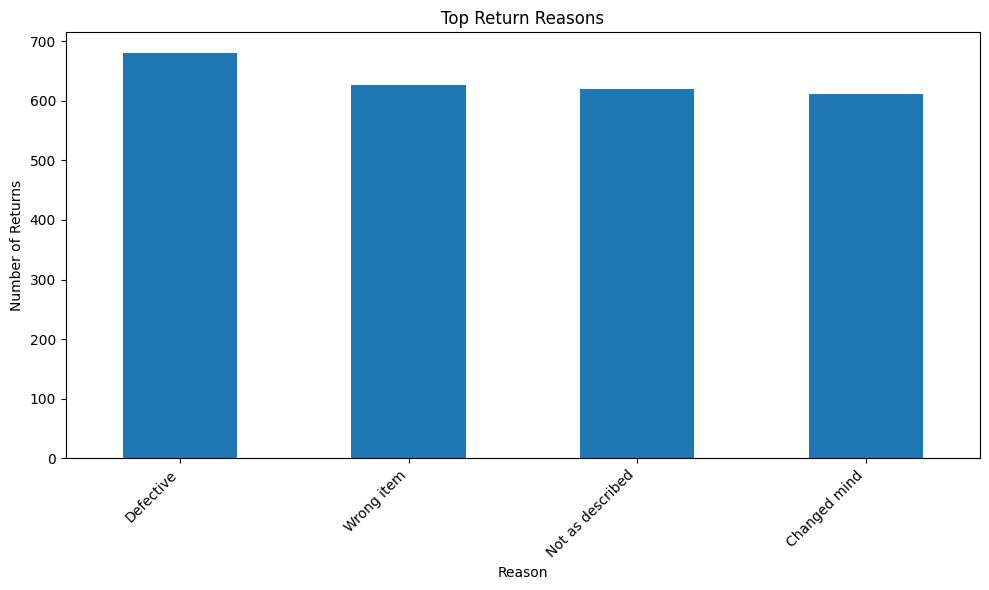

In [23]:

plt.figure(figsize=(10,6))
reason_counts.plot(kind='bar')
plt.title('Top Return Reasons')
plt.xlabel('Reason')
plt.ylabel('Number of Returns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [25]:
# Now safe to calculate Days_to_Return
df['Days_to_Return'] = (df['Return_Date'] - df['Order_Date']).dt.days


In [27]:
df.Days_to_Return

,Days_to_Return
0,387.0
1,31.0
2,NaN
3,NaN
4,NaN
...,...
9994,130.0
9995,NaN
9996,NaN
9997,NaN


In [29]:
df['Days_to_Return']= df['Days_to_Return'].fillna(0)

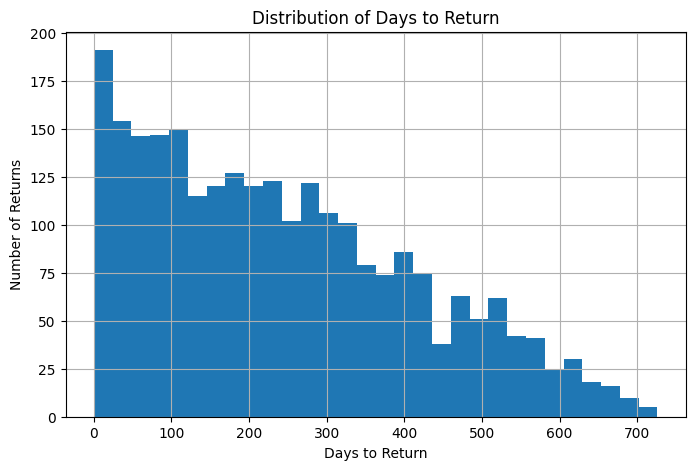

In [31]:
# Distribution of Days_to_Return
plt.figure(figsize=(8,5))
# Recalculate or recreate returned_df to include 'Days_to_Return':
returned_df = df[df['Is_Returned'] == 1]
returned_df['Days_to_Return'].hist(bins=30)
plt.title('Distribution of Days to Return')
plt.xlabel('Days to Return')
plt.ylabel('Number of Returns')
plt.show()

The dataset exhibits a weird pattern with about 2 years of days to return. This phenomenon can be due to the following reasons:
- Synthetic dataset issue — ( dataset is synthetic/fake for training purposes) so it might have been generated with unrealistic dates.
- Data Entry errors — maybe some "Return_Date" values were set much later by mistake.
- Customers exploiting loopholes (in real life) but 700 days would be extremely rare unless the business has a weird policy.

This pattern could possibly hurt the training of the model.

- Model might think "Longer time = more legitimate" — which is wrong.
- Or "delayed returns are normal" — also wrong.



In [33]:
import numpy as np
#Best practise
df['Days_to_Return_Corrected'] = np.where(df['Days_to_Return'] > 120, 120, df['Days_to_Return'])

#Creating flags for late returns
df['Late_Return_Flag'] = np.where(df['Days_to_Return'] > 120, 1, 0)


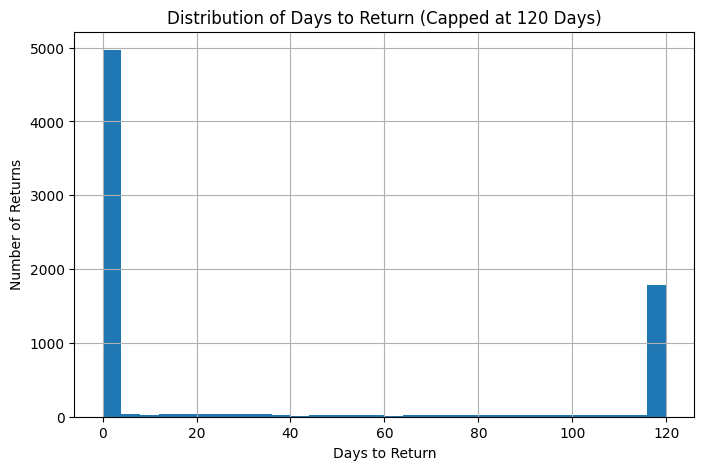

In [34]:
plt.figure(figsize=(8,5))
df['Days_to_Return_Corrected'].hist(bins=30)
plt.title('Distribution of Days to Return (Capped at 120 Days)')
plt.xlabel('Days to Return')
plt.ylabel('Number of Returns')
plt.show()


Based on the synthetic dataset, it raises issues where such behaviour is a possibility (dependent on any company's loophole policies).
Building a suspicious return behaviour scoring system would make a fraud detection system smarter.

The suspicious score will be dependent on the following features:
- Fast returns
- Very late returns
- Suspicious return reasons ("Item Not As Described", "Wrong Item Sent" used too often)

In [35]:
# Define suspicious reasons
suspicious_reasons = [
    'Wrong Item Sent',
    'Item Not as Described',
    'Item Defective',
    'Suspected Fraud'
]

# Create a binary feature
df['Suspicious_Reason_Flag'] = df['Return_Reason'].apply(lambda x: 1 if x in suspicious_reasons else 0)


In [36]:
# Fast returns: returned in <= 2 days (could be scam to get refund without serious intent)
df['Fast_Return_Flag'] = np.where(df['Days_to_Return_Corrected'] <= 2, 1, 0)

# Late returns: more than 30 days considered suspicious in most real e-commerce
df['Late_Return_Flag'] = np.where(df['Days_to_Return_Corrected'] > 30, 1, 0)


In [37]:
# Suspicious Score: sum of flags
df['Suspicious_Score'] = (
    df['Suspicious_Reason_Flag'] +
    df['Fast_Return_Flag'] +
    df['Late_Return_Flag']
)


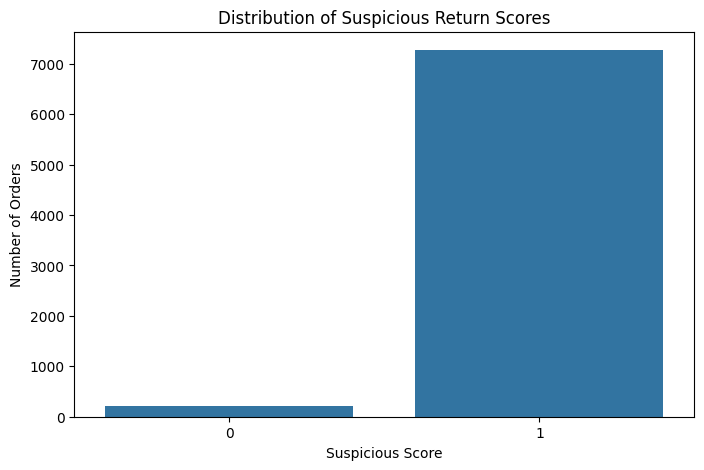

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(x='Suspicious_Score', data=df)
plt.title('Distribution of Suspicious Return Scores')
plt.xlabel('Suspicious Score')
plt.ylabel('Number of Orders')
plt.show()

In [39]:
df.Suspicious_Score.value_counts()

,count
Suspicious_Score,
1,7269
0,218


In [40]:
df.Return_Status.value_counts()

,count
Return_Status,
Not Returned,4948
Returned,2539


In [41]:
# Only apply suspicious behavior scoring to returned items
df['Suspicious_Score'] = 0  # Start with all 0

# Apply only for returned items
returned_mask = df['Is_Returned'] == 1

df.loc[returned_mask, 'Suspicious_Reason_Flag'] = df.loc[returned_mask, 'Return_Reason'].apply(lambda x: 1 if x in suspicious_reasons else 0)
df.loc[returned_mask, 'Fast_Return_Flag'] = np.where(df.loc[returned_mask, 'Days_to_Return_Corrected'] <= 2, 1, 0)
df.loc[returned_mask, 'Late_Return_Flag'] = np.where(df.loc[returned_mask, 'Days_to_Return_Corrected'] > 30, 1, 0)

# Sum the flags ONLY for returned items
df.loc[returned_mask, 'Suspicious_Score'] = (
    df.loc[returned_mask, 'Suspicious_Reason_Flag'] +
    df.loc[returned_mask, 'Fast_Return_Flag'] +
    df.loc[returned_mask, 'Late_Return_Flag']
)


In [42]:
print(df[df['Is_Returned'] == 1]['Suspicious_Score'].value_counts())


Suspicious_Score
1    2321
0     218
Name: count, dtype: int64


In [43]:
df

,Order_ID,Product_ID,User_ID,Order_Date,Return_Date,Product_Category,Product_Price,Order_Quantity,Return_Reason,Return_Status,...,Discount_Applied,Is_Returned,Order_Month,Order_Weekday,Days_to_Return,Days_to_Return_Corrected,Late_Return_Flag,Suspicious_Reason_Flag,Fast_Return_Flag,Suspicious_Score
0,ORD00000000,PROD00000000,USER00000000,2023-08-05,2024-08-26,Clothing,411.59,3,Changed mind,Returned,...,45.27,1,8,Saturday,387.0,120.0,1,0,0,1
1,ORD00000001,PROD00000001,USER00000001,2023-10-09,2023-11-09,Books,288.88,3,Wrong item,Returned,...,47.79,1,10,Monday,31.0,31.0,1,0,0,1
2,ORD00000002,PROD00000002,USER00000002,2023-05-06,NaT,Toys,390.03,5,NaN,Not Returned,...,26.64,0,5,Saturday,0.0,0.0,0,0,1,0
3,ORD00000003,PROD00000003,USER00000003,2024-08-29,NaT,Toys,401.09,3,NaN,Not Returned,...,15.37,0,8,Thursday,0.0,0.0,0,0,1,0
4,ORD00000004,PROD00000004,USER00000004,2023-01-16,NaT,Books,110.09,4,NaN,Not Returned,...,16.37,0,1,Monday,0.0,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,ORD00009994,PROD00009994,USER00009994,2024-07-09,2024-11-16,Toys,224.34,4,Not as described,Returned,...,17.00,1,7,Tuesday,130.0,120.0,1,0,0,1
9995,ORD00009995,PROD00009995,USER00009995,2023-10-20,NaT,Home,142.50,4,NaN,Not Returned,...,34.27,0,10,Friday,0.0,0.0,0,0,1,0
9996,ORD00009996,PROD00009996,USER00009996,2023-02-25,NaT,Electronics,484.63,3,NaN,Not Returned,...,25.44,0,2,Saturday,0.0,0.0,0,0,1,0
9997,ORD00009997,PROD00009997,USER00009997,2024-05-10,NaT,Toys,386.57,5,NaN,Not Returned,...,12.67,0,5,Friday,0.0,0.0,0,0,1,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7487 entries, 0 to 9998
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Order_ID                  7487 non-null   object        
 1   Product_ID                7487 non-null   object        
 2   User_ID                   7487 non-null   object        
 3   Order_Date                7487 non-null   datetime64[ns]
 4   Return_Date               2539 non-null   datetime64[ns]
 5   Product_Category          7487 non-null   object        
 6   Product_Price             7487 non-null   float64       
 7   Order_Quantity            7487 non-null   int64         
 8   Return_Reason             2539 non-null   object        
 9   Return_Status             7487 non-null   object        
 10  User_Age                  7487 non-null   int64         
 11  User_Gender               7487 non-null   object        
 12  User_Location            

## User Behaviour Features

- Some customers abuse return policies repeatedly.

Creating user-level features

- User_total_orders - Total number of orders placed by a user
- User_total_returns - Total number of returns by a user
- User_return_rate - Returns / Orders ratio
- User_avg_days_to_return - Average days they take to return
- User_avg_order_value - Average order value per user
- User_total_spend - Total money spent by the user
- User_suspicious_score_avg - Average suspicious behaviour score per user


In [45]:
# Group by User_ID
user_agg = df.groupby('User_ID').agg(
    User_Total_Orders=('Order_ID', 'count'),
    User_Total_Returns=('Is_Returned', 'sum'),
    User_Return_Rate=('Is_Returned', 'mean'),
    User_Avg_Days_to_Return=('Days_to_Return_Corrected', 'mean'),
    User_Avg_Order_Value=('Product_Price', 'mean'),
    User_Total_Spent=('Product_Price', 'sum'),
    User_Suspicious_Score_Avg=('Suspicious_Score', 'mean')
).reset_index()

# Fill NaN in User_Avg_Days_to_Return with 0 (because users who never returned anything will have NaN)
user_agg['User_Avg_Days_to_Return'] = user_agg['User_Avg_Days_to_Return'].fillna(0)


In [46]:
user_agg

,User_ID,User_Total_Orders,User_Total_Returns,User_Return_Rate,User_Avg_Days_to_Return,User_Avg_Order_Value,User_Total_Spent,User_Suspicious_Score_Avg
0,USER00000000,1,1,1.0,120.0,411.59,411.59,1.0
1,USER00000001,1,1,1.0,31.0,288.88,288.88,1.0
2,USER00000002,1,0,0.0,0.0,390.03,390.03,0.0
3,USER00000003,1,0,0.0,0.0,401.09,401.09,0.0
4,USER00000004,1,0,0.0,0.0,110.09,110.09,0.0
...,...,...,...,...,...,...,...,...
7482,USER00009994,1,1,1.0,120.0,224.34,224.34,1.0
7483,USER00009995,1,0,0.0,0.0,142.50,142.50,0.0
7484,USER00009996,1,0,0.0,0.0,484.63,484.63,0.0
7485,USER00009997,1,0,0.0,0.0,386.57,386.57,0.0


In [47]:
# Merge user-level features back into main dataframe
df = df.merge(user_agg, on='User_ID', how='left')


In [48]:
df

,Order_ID,Product_ID,User_ID,Order_Date,Return_Date,Product_Category,Product_Price,Order_Quantity,Return_Reason,Return_Status,...,Suspicious_Reason_Flag,Fast_Return_Flag,Suspicious_Score,User_Total_Orders,User_Total_Returns,User_Return_Rate,User_Avg_Days_to_Return,User_Avg_Order_Value,User_Total_Spent,User_Suspicious_Score_Avg
0,ORD00000000,PROD00000000,USER00000000,2023-08-05,2024-08-26,Clothing,411.59,3,Changed mind,Returned,...,0,0,1,1,1,1.0,120.0,411.59,411.59,1.0
1,ORD00000001,PROD00000001,USER00000001,2023-10-09,2023-11-09,Books,288.88,3,Wrong item,Returned,...,0,0,1,1,1,1.0,31.0,288.88,288.88,1.0
2,ORD00000002,PROD00000002,USER00000002,2023-05-06,NaT,Toys,390.03,5,NaN,Not Returned,...,0,1,0,1,0,0.0,0.0,390.03,390.03,0.0
3,ORD00000003,PROD00000003,USER00000003,2024-08-29,NaT,Toys,401.09,3,NaN,Not Returned,...,0,1,0,1,0,0.0,0.0,401.09,401.09,0.0
4,ORD00000004,PROD00000004,USER00000004,2023-01-16,NaT,Books,110.09,4,NaN,Not Returned,...,0,1,0,1,0,0.0,0.0,110.09,110.09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7482,ORD00009994,PROD00009994,USER00009994,2024-07-09,2024-11-16,Toys,224.34,4,Not as described,Returned,...,0,0,1,1,1,1.0,120.0,224.34,224.34,1.0
7483,ORD00009995,PROD00009995,USER00009995,2023-10-20,NaT,Home,142.50,4,NaN,Not Returned,...,0,1,0,1,0,0.0,0.0,142.50,142.50,0.0
7484,ORD00009996,PROD00009996,USER00009996,2023-02-25,NaT,Electronics,484.63,3,NaN,Not Returned,...,0,1,0,1,0,0.0,0.0,484.63,484.63,0.0
7485,ORD00009997,PROD00009997,USER00009997,2024-05-10,NaT,Toys,386.57,5,NaN,Not Returned,...,0,1,0,1,0,0.0,0.0,386.57,386.57,0.0


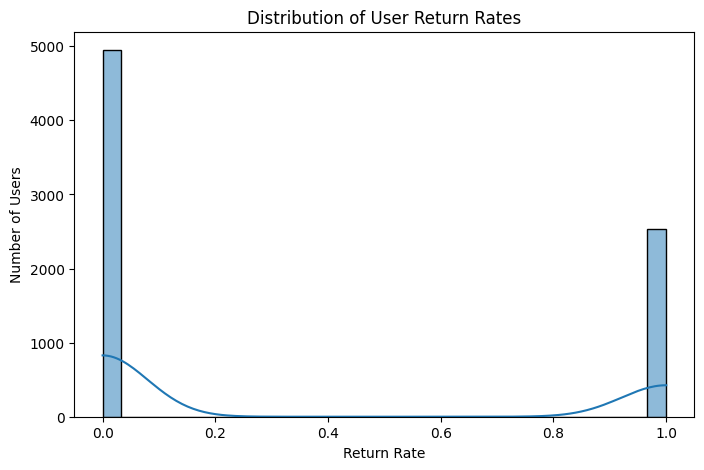

In [49]:
plt.figure(figsize=(8,5))
sns.histplot(user_agg['User_Return_Rate'], bins=30, kde=True)
plt.title('Distribution of User Return Rates')
plt.xlabel('Return Rate')
plt.ylabel('Number of Users')
plt.show()

Behaviour in real-world:
- In real-world e-commerce too:
A lot of customers rarely return anything.
- A small segment abuses the system (returns everything they buy).

Possible fraud flag:
- Users who return 100% of their orders are highly suspicious for refund abuse.


In [50]:
# New feature: High Returner Flag
df['High_Returner_Flag'] = np.where(df['User_Return_Rate'] >= 0.9, 1, 0)


In [51]:
# Create a High Returner Flag
user_agg['High_Returner_Flag'] = np.where(user_agg['User_Return_Rate'] >= 0.9, 1, 0)

# How many high returners?
print(user_agg['High_Returner_Flag'].value_counts())


High_Returner_Flag
0    4948
1    2539
Name: count, dtype: int64


In [52]:
# High Returners vs Others
high_returners = user_agg[user_agg['High_Returner_Flag'] == 1]
normal_users = user_agg[user_agg['High_Returner_Flag'] == 0]

print("High Returners Summary:")
print(high_returners.describe())

print("\nNormal Users Summary:")
print(normal_users.describe())


High Returners Summary:
       User_Total_Orders  User_Total_Returns  User_Return_Rate  \
count             2539.0              2539.0            2539.0   
mean                 1.0                 1.0               1.0   
std                  0.0                 0.0               0.0   
min                  1.0                 1.0               1.0   
25%                  1.0                 1.0               1.0   
50%                  1.0                 1.0               1.0   
75%                  1.0                 1.0               1.0   
max                  1.0                 1.0               1.0   

       User_Avg_Days_to_Return  User_Avg_Order_Value  User_Total_Spent  \
count              2539.000000           2539.000000       2539.000000   
mean                100.687278            256.505920        256.505920   
std                  34.927842            142.970513        142.970513   
min                   0.000000              5.270000          5.270000   
25%        

<ipython-input-53-85b6b4148edf>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(high_returners['User_Avg_Days_to_Return'], label='High Returners', shade=True)
<ipython-input-53-85b6b4148edf>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(normal_users['User_Avg_Days_to_Return'], label='Normal Users', shade=True)
<ipython-input-53-85b6b4148edf>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(normal_users['User_Avg_Days_to_Return'], label='Normal Users', shade=True)


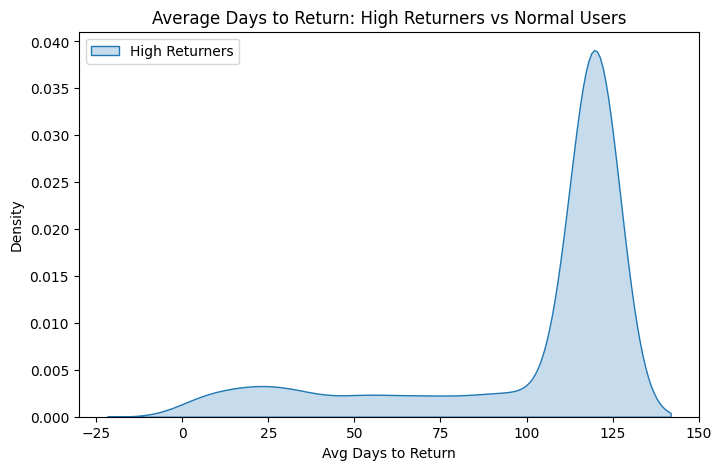

In [53]:
#avg days to return
plt.figure(figsize=(8,5))
sns.kdeplot(high_returners['User_Avg_Days_to_Return'], label='High Returners', shade=True)
sns.kdeplot(normal_users['User_Avg_Days_to_Return'], label='Normal Users', shade=True)
plt.title('Average Days to Return: High Returners vs Normal Users')
plt.xlabel('Avg Days to Return')
plt.legend()
plt.show()


<ipython-input-54-29c5679d9465>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(high_returners['User_Suspicious_Score_Avg'], label='High Returners', shade=True)
<ipython-input-54-29c5679d9465>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(normal_users['User_Suspicious_Score_Avg'], label='Normal Users', shade=True)
<ipython-input-54-29c5679d9465>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(normal_users['User_Suspicious_Score_Avg'], label='Normal Users', shade=True)


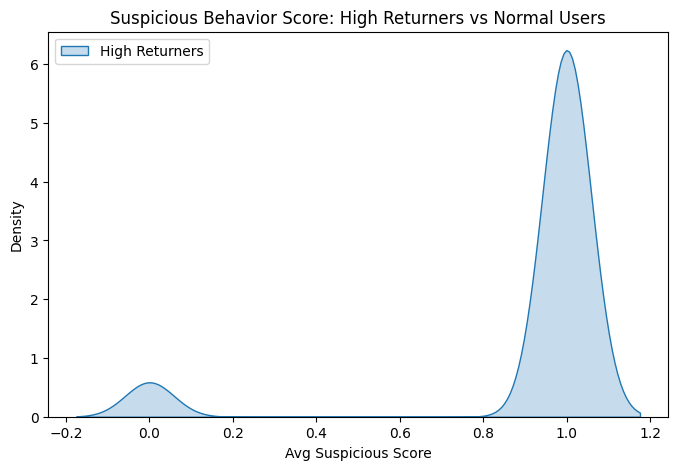

In [54]:
plt.figure(figsize=(8,5))
sns.kdeplot(high_returners['User_Suspicious_Score_Avg'], label='High Returners', shade=True)
sns.kdeplot(normal_users['User_Suspicious_Score_Avg'], label='Normal Users', shade=True)
plt.title('Suspicious Behavior Score: High Returners vs Normal Users')
plt.xlabel('Avg Suspicious Score')
plt.legend()
plt.show()


In [56]:
#to have a granular look into which product is returned more often
# Group by Product Category

returned_df = df[df['Is_Returned'] == 1]

category_days = returned_df.groupby('Product_Category')['Days_to_Return_Corrected'].mean().sort_values(ascending=False)

print(category_days)

Product_Category
Clothing       102.854127
Books          100.511797
Electronics    100.456250
Home            99.890220
Toys            99.613169
Name: Days_to_Return_Corrected, dtype: float64


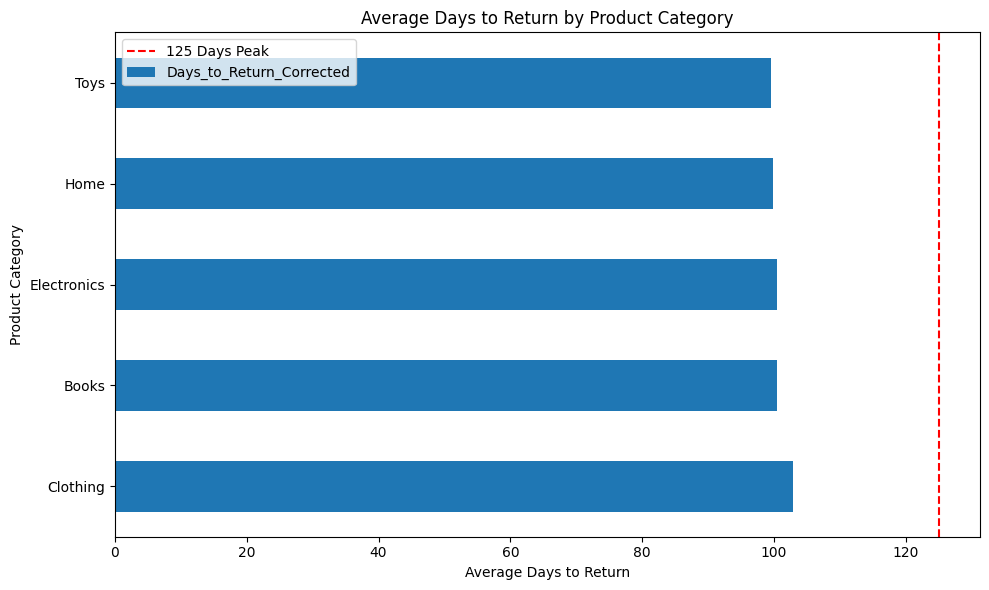

In [57]:
plt.figure(figsize=(10,6))
category_days.plot(kind='barh')
plt.title('Average Days to Return by Product Category')
plt.xlabel('Average Days to Return')
plt.ylabel('Product Category')
plt.axvline(125, color='red', linestyle='--', label='125 Days Peak')
plt.legend()
plt.tight_layout()
plt.show()

- All major product categories have very long average return times (~100 days) which is quite unusual.

- In the real world, typical return windows are 30 to 60 days for most products.

- Clothing has the highest avg days (~103 days).
- Clothing usually has shorter return cycles (~14–30 days) in reality.
- 100+ days suggests either:
Extremely lenient return policies
Customers abusing seasonal purchases (e.g., buying winter jackets in November, returning in February)
- Electronics around 100 days could indicate warranty abuse.
Buy an electronic product.
Use it until it breaks, then return it at the last minute. (quite an unrealistic scenario)
- Home and Toys also peaking at 100 days is strange.
Normally toys and home items are used quickly, and issues noticed early.

In [58]:
# Set threshold - categories with avg return > 90 days
high_delay_categories = ['Clothing', 'Books', 'Electronics', 'Home', 'Toys']

df['High_Delay_Category_Flag'] = df['Product_Category'].apply(
    lambda x: 1 if x in high_delay_categories else 0
)


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7487 entries, 0 to 7486
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Order_ID                   7487 non-null   object        
 1   Product_ID                 7487 non-null   object        
 2   User_ID                    7487 non-null   object        
 3   Order_Date                 7487 non-null   datetime64[ns]
 4   Return_Date                2539 non-null   datetime64[ns]
 5   Product_Category           7487 non-null   object        
 6   Product_Price              7487 non-null   float64       
 7   Order_Quantity             7487 non-null   int64         
 8   Return_Reason              2539 non-null   object        
 9   Return_Status              7487 non-null   object        
 10  User_Age                   7487 non-null   int64         
 11  User_Gender                7487 non-null   object        
 12  User_L

In [60]:
df.High_Delay_Category_Flag.value_counts()

,count
High_Delay_Category_Flag,
1,7487


In [61]:
#all the items bought belong to high delay category
#drop column
df.drop(columns='High_Delay_Category_Flag',inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7487 entries, 0 to 7486
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Order_ID                   7487 non-null   object        
 1   Product_ID                 7487 non-null   object        
 2   User_ID                    7487 non-null   object        
 3   Order_Date                 7487 non-null   datetime64[ns]
 4   Return_Date                2539 non-null   datetime64[ns]
 5   Product_Category           7487 non-null   object        
 6   Product_Price              7487 non-null   float64       
 7   Order_Quantity             7487 non-null   int64         
 8   Return_Reason              2539 non-null   object        
 9   Return_Status              7487 non-null   object        
 10  User_Age                   7487 non-null   int64         
 11  User_Gender                7487 non-null   object        
 12  User_L

In [63]:
df.fillna(0,inplace=True)

<ipython-input-63-94eb4b9a2b2d>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.fillna(0,inplace=True)


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7487 entries, 0 to 7486
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Order_ID                   7487 non-null   object        
 1   Product_ID                 7487 non-null   object        
 2   User_ID                    7487 non-null   object        
 3   Order_Date                 7487 non-null   datetime64[ns]
 4   Return_Date                7487 non-null   object        
 5   Product_Category           7487 non-null   object        
 6   Product_Price              7487 non-null   float64       
 7   Order_Quantity             7487 non-null   int64         
 8   Return_Reason              7487 non-null   object        
 9   Return_Status              7487 non-null   object        
 10  User_Age                   7487 non-null   int64         
 11  User_Gender                7487 non-null   object        
 12  User_L

In [68]:
df.User_Suspicious_Score_Avg.value_counts()

,count
User_Suspicious_Score_Avg,
0.0,5166
1.0,2321


In [69]:
df.High_Returner_Flag.value_counts()

,count
High_Returner_Flag,
0,4948
1,2539


In [70]:
df.Suspicious_Score.value_counts()

,count
Suspicious_Score,
0,5166
1,2321


In [73]:
df.User_Suspicious_Score_Avg

,User_Suspicious_Score_Avg
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
7482,1.0
7483,0.0
7484,0.0
7485,0.0


In [74]:
#drop columns
df.drop(columns=['User_Avg_Days_to_Return','User_Suspicious_Score_Avg'],inplace=True)


In [76]:
df.User_Return_Rate.value_counts()

,count
User_Return_Rate,
0.0,4948
1.0,2539


In [77]:
df.User_Total_Spent

,User_Total_Spent
0,411.59
1,288.88
2,390.03
3,401.09
4,110.09
...,...
7482,224.34
7483,142.50
7484,484.63
7485,386.57


## Features for the model





In [78]:
user_agg['Is_Fraudulent_User'] = np.where(
    (user_agg['User_Return_Rate'] >= 0.8) & (user_agg['High_Returner_Flag'] == 1),
    1,0)


In [85]:
df.columns

Index(['Order_ID', 'Product_ID', 'User_ID', 'Order_Date', 'Return_Date',
       'Product_Category', 'Product_Price', 'Order_Quantity', 'Return_Reason',
       'Return_Status', 'User_Age', 'User_Gender', 'User_Location',
       'Payment_Method', 'Shipping_Method', 'Discount_Applied', 'Is_Returned',
       'Order_Month', 'Order_Weekday', 'Days_to_Return',
       'Days_to_Return_Corrected', 'Late_Return_Flag',
       'Suspicious_Reason_Flag', 'Fast_Return_Flag', 'Suspicious_Score',
       'User_Total_Orders', 'User_Total_Returns', 'User_Return_Rate',
       'User_Avg_Order_Value', 'User_Total_Spent', 'High_Returner_Flag'],
      dtype='object')

In [86]:
X = df[[
    'Product_Price',
    'Order_Quantity',
    'Discount_Applied',
    'Days_to_Return_Corrected',
    'Late_Return_Flag',
    'Suspicious_Reason_Flag',
    'Fast_Return_Flag',
    'Suspicious_Score',
    'User_Total_Orders',
    'User_Total_Returns',
    'User_Return_Rate',
    'User_Avg_Order_Value',
    'User_Total_Spent',
    'High_Returner_Flag'
]
]
y = user_agg['Is_Fraudulent_User']


In [80]:

#using standscaler to normalise the input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [87]:
# prompt: INITIALISE xgBOOST

import xgboost as xgb

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [88]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [89]:

import joblib

# Save the model
joblib.dump(xgb_model, 'XGBmodel.pkl')

['XGBmodel.pkl']